<a href="https://colab.research.google.com/github/priteshparmar9/ML_LabWork_CE083/blob/main/ML_Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART A

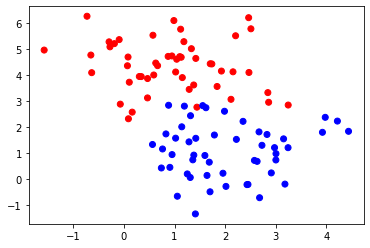

Best params:  {'C': 10}
Best score:  0.9375


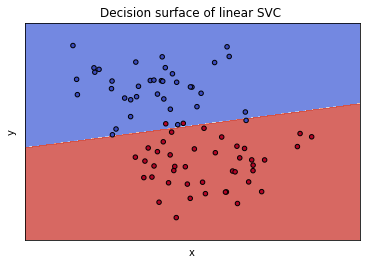

Accuracy:  0.85
Confusion matrix:
 [[12  1]
 [ 2  5]]


In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import metrics

# create dataset with two classes and 100 samples
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)

# scatter plots
# class 0 denoted by red points and class 1 denoted by blue points
colormap = np.array(['r', 'b'])
plt.scatter(X[:,0], X[:,1], c=colormap[y])
plt.show()

# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# linear SVM classifier
parameters={'C':[0.001, 0.01, 0.1, 1, 10, 100]}
svc = svm.SVC(kernel='linear')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_)
print("Best score: ", clf.best_score_)

# plotting for decision boundary
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC ')
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# predicting the test data
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# PART B

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print(cancer.target_names)

['malignant' 'benign']


In [ ]:
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [ ]:
print(len(cancer.data))

569


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9766081871345029
Precision: 0.990909090909091
Recall: 0.9732142857142857


# MNIST

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
X, Y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

In [6]:
len(X_train)

17500

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.75)
clf = svm.SVC(kernel='linear')

# Linear

In [7]:
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [11]:
y_pred = clf.predict(X_test[:5000])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test[:5000], y_pred))
print("Precision:",metrics.precision_score(Y_test[:5000], y_pred, average='weighted'))
print("Recall:",metrics.recall_score(Y_test[:5000], y_pred, average='weighted'))

Accuracy: 0.9016
Precision: 0.9016784453376498
Recall: 0.9016


# Polynomial

In [13]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test[:5000])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test[:5000], y_pred))
print("Precision:",metrics.precision_score(Y_test[:5000], y_pred, average='weighted'))
print("Recall:",metrics.recall_score(Y_test[:5000], y_pred, average='weighted'))

Accuracy: 0.964
Precision: 0.964250574667536
Recall: 0.964


# RBF Kernel

In [12]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test[:5000])
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test[:5000], y_pred))
print("Precision:",metrics.precision_score(Y_test[:5000], y_pred, average='weighted'))
print("Recall:",metrics.recall_score(Y_test[:5000], y_pred, average='weighted'))

Accuracy: 0.9674
Precision: 0.967343440804278
Recall: 0.9674
